In [2]:
#check the direction

In [3]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [4]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Work_with_MM")

# Verify the change
print(os.getcwd())


H:\Work_with_MM


In [4]:
import matplotlib.pyplot as plt

In [5]:

import pandas as pd
import pandas as gpd
import regionmask
import numpy as np
import geopandas
import xarray as xr
import seaborn as sns
import rioxarray
from shapely.geometry import mapping
import netCDF4
import netCDF4 as nc
from PIL import Image
import os
from netCDF4 import Dataset
import geopandas as gpd
import numpy as np
from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
from scipy.stats import linregress
#from xarrayMannKendall import MannKendall
import pymannkendall as mk
from scipy.stats import kendalltau

In [6]:
# Test the data (data of January, February, March, April_2007)

Data_Dis = xr.open_dataset(r"combined_dis24_2.nc")

In [7]:
Data_Dis

<xarray.Dataset> Size: 145MB
Dimensions:     (valid_time: 9283, latitude: 64, longitude: 61)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 74kB 2000-01-02 ... 2025-06-01
    surface     float64 8B ...
  * latitude    (latitude) float64 512B 32.98 32.93 32.88 ... 29.93 29.88 29.82
  * longitude   (longitude) float64 488B 47.48 47.52 47.57 ... 50.37 50.42 50.48
Data variables:
    dis24       (valid_time, latitude, longitude) float32 145MB ...

In [45]:
import xarray as xr
import glob
import os

# Define the folder containing the NetCDF files
data_folder = 'All_Data_An'

# Define the variable you want to combine
variable_to_combine = 'dis24'

try:
    # Use glob to find all .nc files in the specified folder
    file_paths = glob.glob(os.path.join(data_folder, '*.nc'))

    if not file_paths:
        print(f"No NetCDF files found in the folder: '{data_folder}'.")
    else:
        # Open multiple datasets and combine them along the time dimension
        # The `combine='by_coords'` argument is used to ensure proper ordering
        ds_combined = xr.open_mfdataset(file_paths, combine='by_coords')

        # Select only the 'dis24' variable
        ds_dis24 = ds_combined[variable_to_combine]

        # Save the combined dataset to a new NetCDF file
        output_file_name = 'combined_dis24_2.nc'
        ds_dis24.to_netcdf(output_file_name)

        print(f"Successfully combined the '{variable_to_combine}' variable into a new file: '{output_file_name}'.")

except FileNotFoundError:
    print(f"Error: The folder '{data_folder}' was not found. Please ensure it exists and is in the correct path.")
except KeyError:
    print(f"Error: The variable '{variable_to_combine}' was not found in one or more of the datasets.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully combined the 'dis24' variable into a new file: 'combined_dis24_2.nc'.


=== DATASET SUMMARY ===
Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 9283, 'latitude': 64, 'longitude': 61})
Variables: ['dis24']
Time range: 2000-01-02T00:00:00.000000000 to 2025-06-01T00:00:00.000000000

=== KEY STATISTICS ===
Overall mean: 50.78 m³/s
Max discharge: 48675.50 m³/s
Min discharge: 0.00 m³/s
Std deviation: 455.57 m³/s


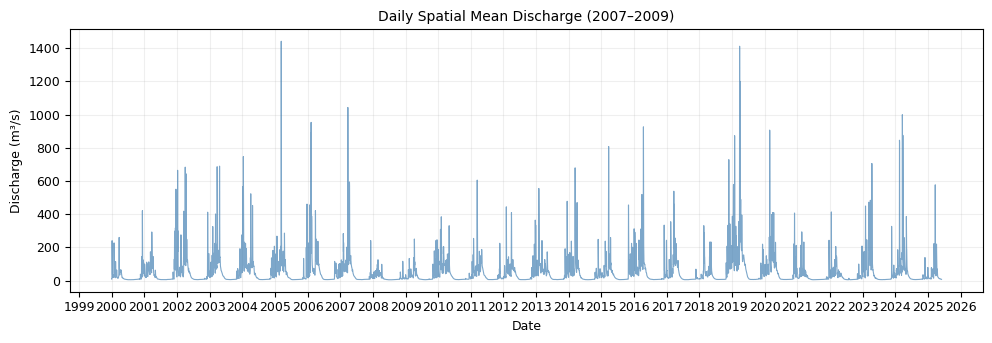

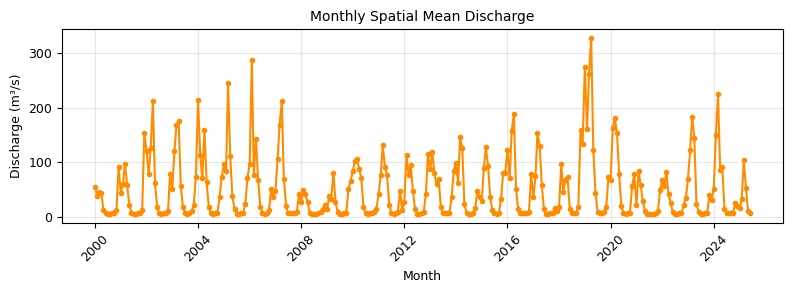

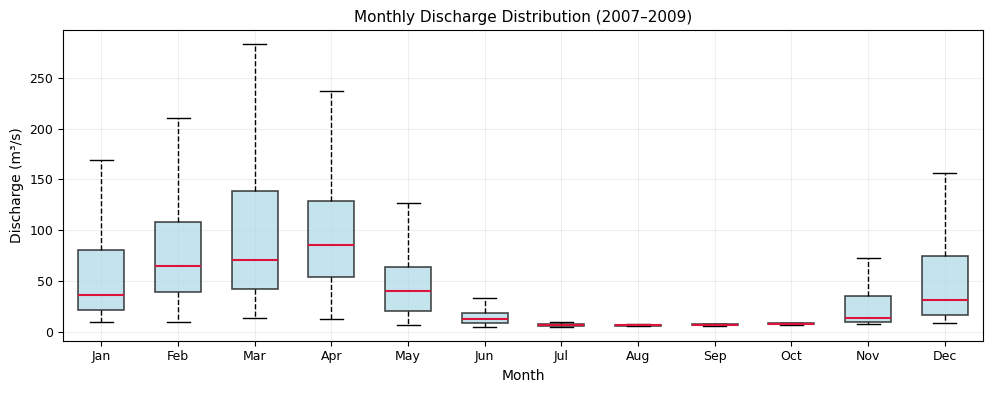

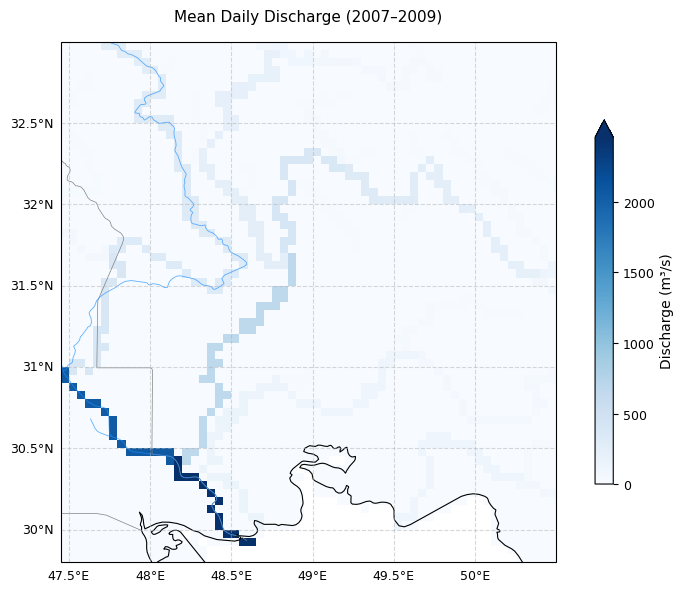

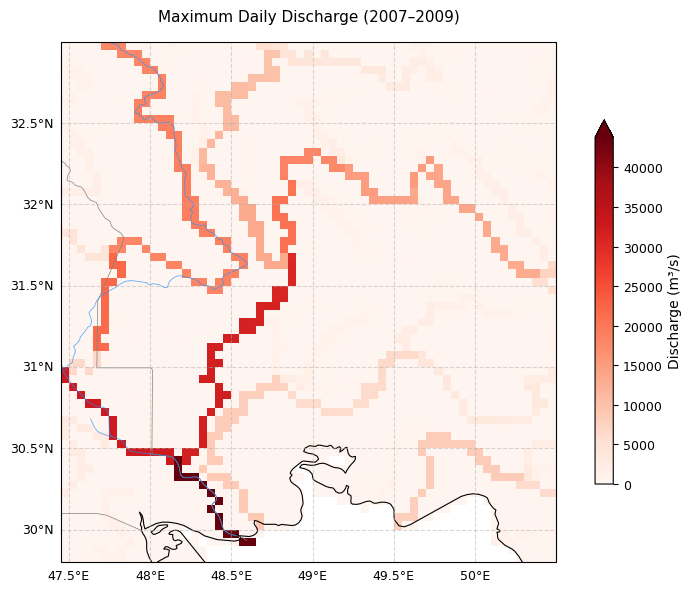


✅ Professional visualizations generated with optimized layouts!


In [15]:
# -*- coding: utf-8 -*-
"""
Enhanced Professional Analysis of Combined Discharge Data (2007–2009)
- Fixed box plot implementation
- Smaller figures with optimized layouts
- Professional font scaling
"""

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter

# Set global font sizes for consistency
SMALL_SIZE = 9
MEDIUM_SIZE = 10
LARGE_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # Controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # Font size of axes titles
plt.rc('axes', labelsize=MEDIUM_SIZE)     # Font size of axis labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # Legend font size
plt.rc('figure', titlesize=LARGE_SIZE)    # Figure title size

# ================== 1. Load Dataset ==================
file_path = r"combined_dis24_2.nc"
Data_Dis = xr.open_dataset(file_path)

# Print full dataset information (minimalist)
print("=== DATASET SUMMARY ===")
print(f"Dimensions: {Data_Dis.dims}")
print(f"Variables: {list(Data_Dis.data_vars)}")
print(f"Time range: {Data_Dis.valid_time.min().values} to {Data_Dis.valid_time.max().values}")

# Select discharge variable
dis = Data_Dis['dis24']  # Shape: (1096, 93, 103)

# ================== 2. Basic Statistics (Cleaned) ==================
print("\n=== KEY STATISTICS ===")
print(f"Overall mean: {dis.mean().item():.2f} m³/s")
print(f"Max discharge: {dis.max().item():.2f} m³/s")
print(f"Min discharge: {dis.min().item():.2f} m³/s")
print(f"Std deviation: {dis.std().item():.2f} m³/s")

# ================== 3. Daily Time Series (Compact) ==================
plt.figure(figsize=(10, 3.5))  # Smaller figure
dis_daily_avg = dis.mean(dim=['latitude', 'longitude'])
dis_daily_avg.plot.line('steelblue', linewidth=0.8, alpha=0.7)
plt.title('Daily Spatial Mean Discharge (2007–2009)', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Date', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.2)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# ================== 4. Monthly Mean Time Series (Compact) ==================
plt.figure(figsize=(8, 3))  # Smaller figure
dis_monthly_avg = dis.resample(valid_time='MS').mean().mean(dim=['latitude', 'longitude'])
dis_monthly_avg.plot.line('darkorange', marker='o', markersize=3, linewidth=1.5)
plt.title('Monthly Spatial Mean Discharge', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Month', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== 5. BOX PLOTS: Monthly Discharge Distribution (FIXED!) ==================
# Prepare data: Convert to DataFrame and group by month
daily_spatial_mean = dis.mean(dim=['latitude', 'longitude']).to_dataframe(name='discharge')
daily_spatial_mean['month'] = daily_spatial_mean.index.month

# Create a list of discharge values for each month
monthly_data = []
for month in range(1, 13):
    month_vals = daily_spatial_mean[daily_spatial_mean['month'] == month]['discharge'].dropna()
    monthly_data.append(month_vals)

# Create professional box plot with matplotlib
plt.figure(figsize=(10, 4))
box_plot = plt.boxplot(
    monthly_data,
    positions=range(1, 13),
    showfliers=False,  # Omit extreme outliers
    patch_artist=True,
    boxprops=dict(linewidth=1.2, facecolor='lightblue', alpha=0.7),
    medianprops=dict(linewidth=1.5, color='crimson'),
    whiskerprops=dict(linewidth=1, linestyle='--'),
    capprops=dict(linewidth=1, color='black'),
    widths=0.6
)

plt.title('Monthly Discharge Distribution (2007–2009)', fontsize=LARGE_SIZE-1)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE)
plt.xlabel('Month', fontsize=MEDIUM_SIZE)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# ================== 6. Spatial Maps (Compact Layout) ==================
def plot_spatial_map(data, title, cmap='viridis', vmin=None, vmax=None):
    plt.figure(figsize=(8, 6))  # Smaller map size
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    if vmin is None:
        vmin = data.min().item() * 0.9
    if vmax is None:
        vmax = data.max().item() * 0.9
    
    cs = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        cbar_kwargs={'label': 'Discharge (m³/s)', 'shrink': 0.7},
        vmin=vmin,
        vmax=vmax,
        add_colorbar=True
    )
    
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth=0.6, alpha=0.7)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    plt.title(title, fontsize=MEDIUM_SIZE+1, pad=15)
    plt.tight_layout()
    plt.show()

# Mean discharge map
plot_spatial_map(
    dis.mean(dim='valid_time'),
    "Mean Daily Discharge (2007–2009)",
    cmap='Blues',
    vmin=0
)

# Max discharge map
plot_spatial_map(
    dis.max(dim='valid_time'),
    "Maximum Daily Discharge (2007–2009)",
    cmap='Reds',
    vmin=0
)

print("\n✅ Professional visualizations generated with optimized layouts!")

In [37]:
Data_All = xr.open_dataset(r"combined_dis24_2.nc")

In [19]:
Data_All

<xarray.Dataset> Size: 145MB
Dimensions:     (valid_time: 9283, latitude: 64, longitude: 61)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 74kB 2000-01-02 ... 2025-06-01
    surface     float64 8B ...
  * latitude    (latitude) float64 512B 32.98 32.93 32.88 ... 29.93 29.88 29.82
  * longitude   (longitude) float64 488B 47.48 47.52 47.57 ... 50.37 50.42 50.48
Data variables:
    dis24       (valid_time, latitude, longitude) float32 145MB ...

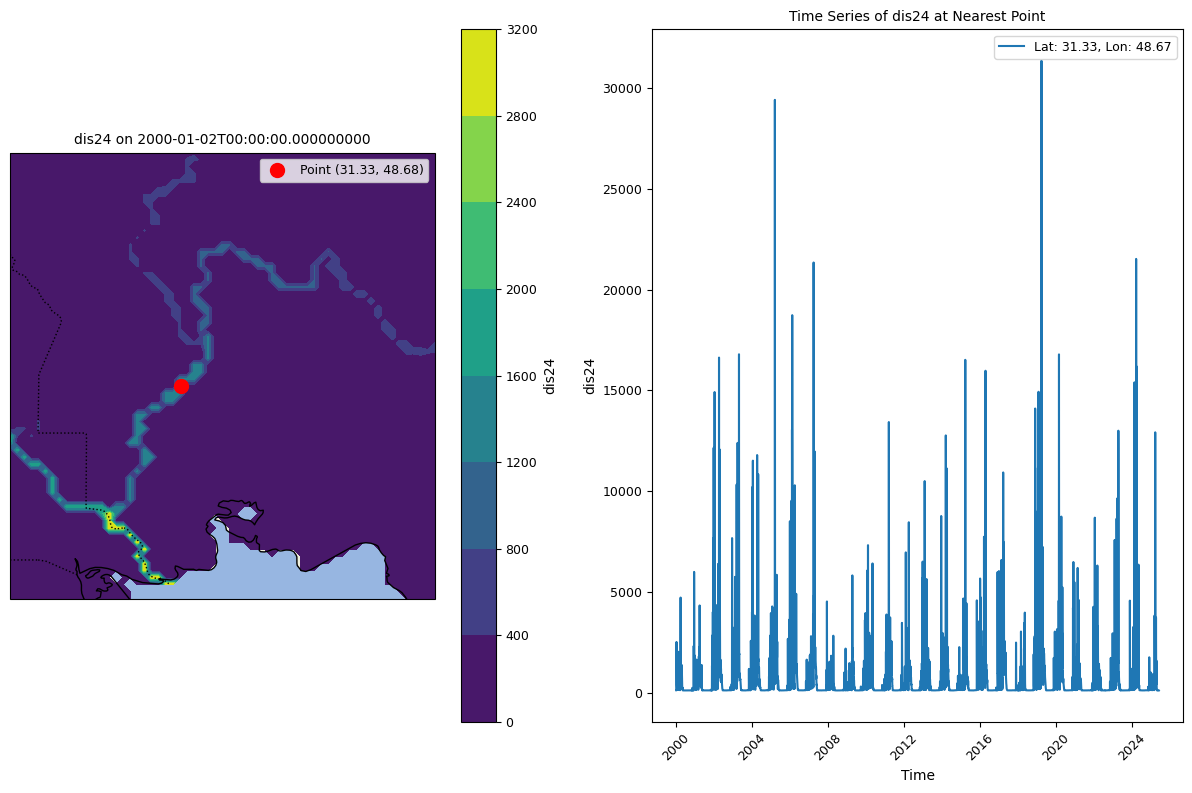

In [57]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the dataset
Data_All = xr.open_dataset(r"combined_dis24_2.nc")

# Coordinates of the point of interest
target_lat = 31.33
target_lon = 48.68

# Select the nearest grid point for the time series
point_data = Data_All['dis24'].sel(latitude=target_lat, longitude=target_lon, method='nearest')

# Create a figure with two subplots: one for the map, one for the time series
fig = plt.figure(figsize=(12, 8))

# --- Map Plot ---
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
# Plot the dis24 variable for the first time step
map_data = Data_All['dis24'].isel(valid_time=100)  # First time step (2007-01-02)
map_plot = ax1.contourf(
    Data_All['longitude'], Data_All['latitude'], map_data,
    cmap='viridis', transform=ccrs.PlateCarree()
)
# Add map features
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
# Mark the point of interest
ax1.plot(target_lon, target_lat, 'ro', markersize=10, transform=ccrs.PlateCarree(), label='Point (31.33, 48.68)')
# Add colorbar
plt.colorbar(map_plot, ax=ax1, label='dis24')
# Set title and labels
ax1.set_title(f'dis24 on {Data_All["valid_time"].isel(valid_time=0).values}')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()

# --- Time Series Plot ---
ax2 = fig.add_subplot(122)
# Plot the time series at the selected point
ax2.plot(Data_All['valid_time'], point_data, label=f'Lat: {point_data.latitude.values:.2f}, Lon: {point_data.longitude.values:.2f}')
# Set title and labels
ax2.set_title('Time Series of dis24 at Nearest Point')
ax2.set_xlabel('Time')
ax2.set_ylabel('dis24')
ax2.legend()
# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


✅ Model data extracted at:
   Selected Latitude: 31.325000
   Selected Longitude: 48.675000
   Distance from target: 0.0083°, 0.0083°

⏱️ Common time period: 2006-09-21 to 2016-09-21
   Model data points: 3654
   Observation data points: 3654


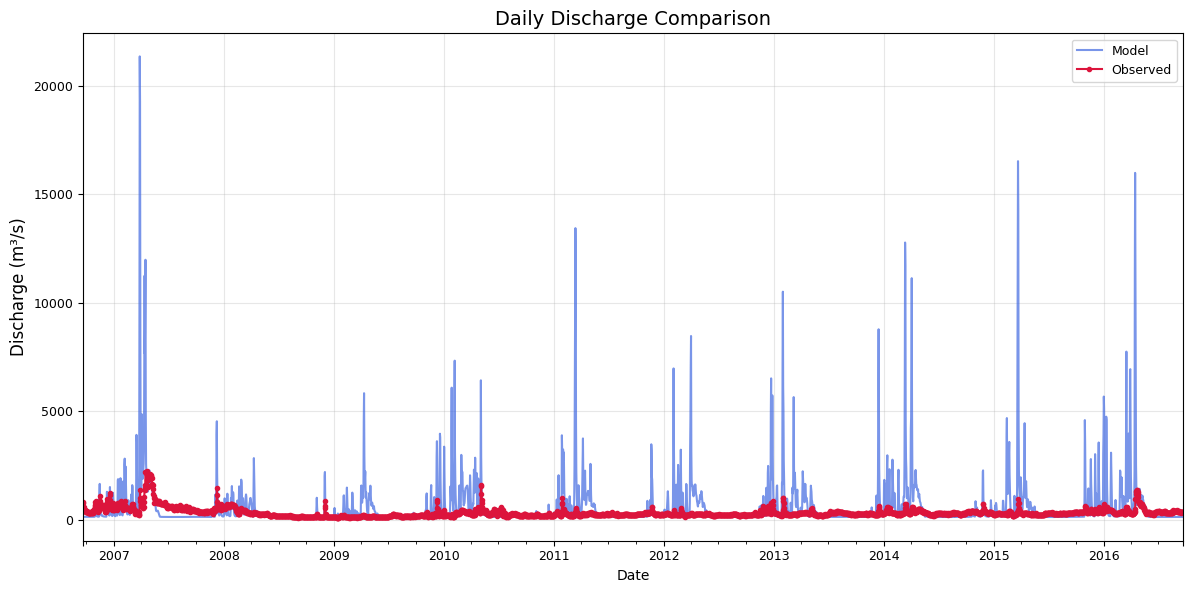

C:\Users\AAAli\AppData\Local\Temp\ipykernel_7528\3105082047.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample('M').mean(numeric_only=True)


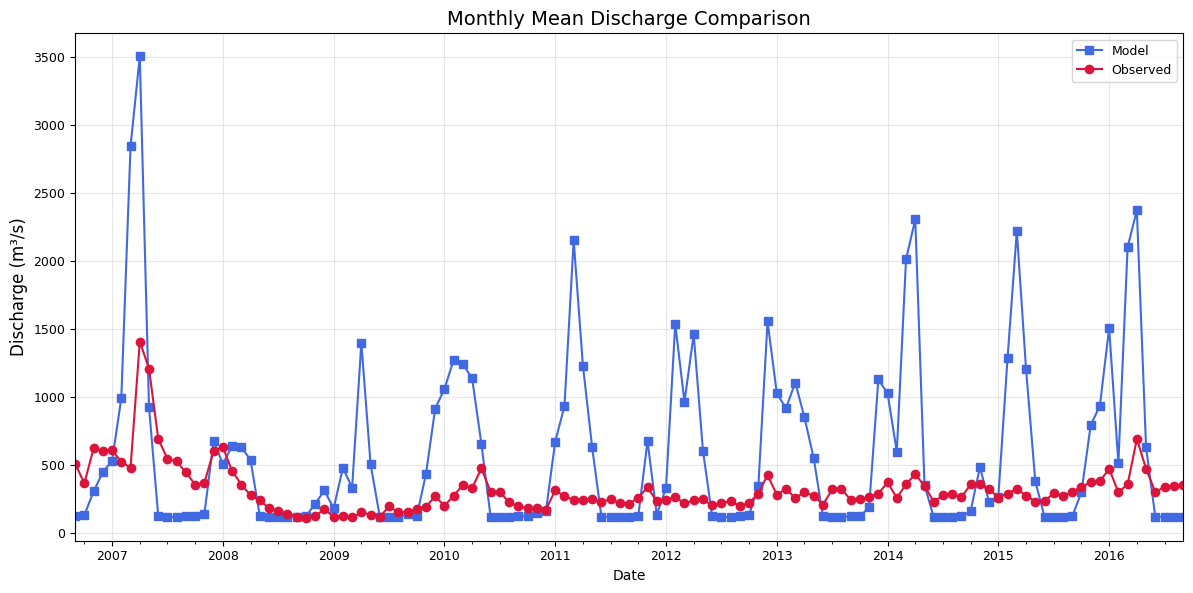


📊 Monthly Statistics:
Model Mean: 577.69 m³/s
Observed Mean: 317.67 m³/s
MAE: 412.08 m³/s
RMSE: 650.44 m³/s
NSE: -12.028


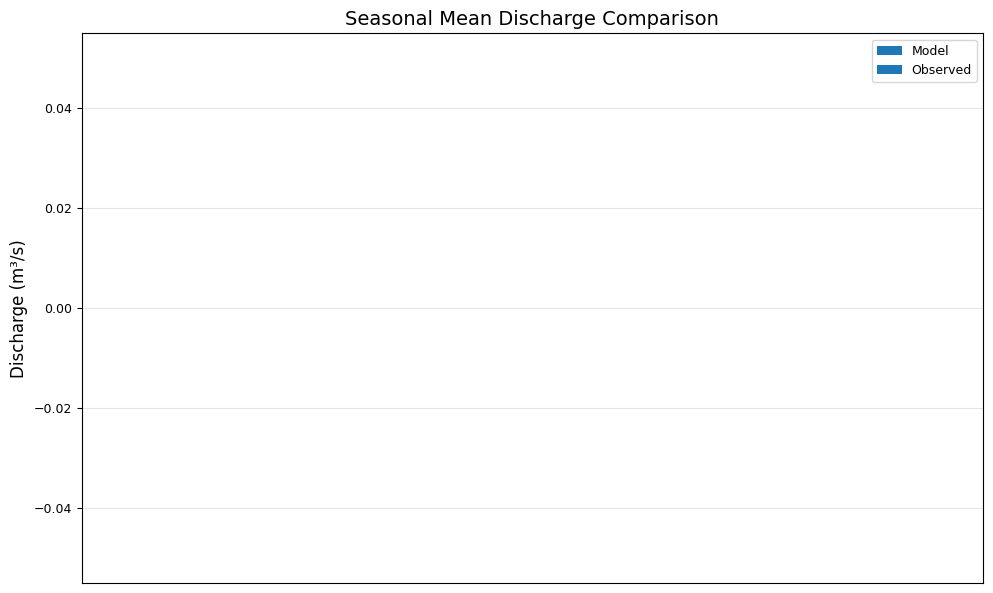


✅ Analysis complete!


In [50]:
# -*- coding: utf-8 -*-
"""
Model vs Observation Discharge Comparison at Ahvaz Station (Monthly & Seasonal Analysis!)
- Added monthly and seasonal aggregation
- Includes new visualizations and statistical comparisons
- All previous fixes for data loading and alignment included
"""

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ================== 1. Configuration ==================
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# ================== 2. Load and Prepare Model Data ==================
ds = xr.open_dataset(model_path)
dis = ds['dis24']  # Discharge variable

# Use xarray's built-in nearest neighbor selection
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)

print(f"\n✅ Model data extracted at:")
print(f"   Selected Latitude: {model_point.latitude.values:.6f}")
print(f"   Selected Longitude: {model_point.longitude.values:.6f}")
print(f"   Distance from target: {np.abs(target_lat - model_point.latitude.values):.4f}°, "
      f"{np.abs(target_lon - model_point.longitude.values):.4f}°")

model_ts = model_point.to_dataframe(name='model_discharge')

# ================== 3. Load Observation Data (FLEXIBLE DATE PARSING) ==================
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')  # Flexible parsing
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)

# Remove rows with invalid dates
if obs_df.index.hasnans:
    obs_df = obs_df.dropna(subset=['obs_discharge'])

# ================== 4. Align Time Periods ==================
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

print(f"\n⏱️ Common time period: {common_start.strftime('%Y-%m-%d')} to {common_end.strftime('%Y-%m-%d')}")
print(f"   Model data points: {len(model_common):d}")
print(f"   Observation data points: {len(obs_common):d}")

# ================== 5. Daily Comparison (Original) ==================
plt.figure(figsize=(12, 6))
model_common['model_discharge'].plot(label='Model', color='royalblue', alpha=0.7)
obs_common['obs_discharge'].plot(label='Observed', color='crimson', marker='o', markersize=3)
plt.title('Daily Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================== 6. Monthly Aggregation ==================
def aggregate_monthly(data):
    monthly = data.resample('M').mean(numeric_only=True)
    monthly.index = monthly.index.to_period('M')  # Use period for better labeling
    return monthly

model_monthly = aggregate_monthly(model_common)
obs_monthly = aggregate_monthly(obs_common)

# Monthly comparison plot
plt.figure(figsize=(12, 6))
model_monthly['model_discharge'].plot(label='Model', color='royalblue', marker='s')
obs_monthly['obs_discharge'].plot(label='Observed', color='crimson', marker='o')
plt.title('Monthly Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly statistics
if len(model_monthly) > 0 and len(obs_monthly) > 0:
    merged_monthly = pd.merge(model_monthly, obs_monthly, left_index=True, right_index=True, how='inner')
    print("\n📊 Monthly Statistics:")
    print(f"Model Mean: {merged_monthly['model_discharge'].mean():.2f} m³/s")
    print(f"Observed Mean: {merged_monthly['obs_discharge'].mean():.2f} m³/s")
    print(f"MAE: {mean_absolute_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge']):.2f} m³/s")
    print(f"RMSE: {np.sqrt(mean_squared_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge'])):.2f} m³/s")
    
    # NSE for monthly
    obs_mean_monthly = merged_monthly['obs_discharge'].mean()
    numerator = ((merged_monthly['obs_discharge'] - merged_monthly['model_discharge'])**2).sum()
    denominator = ((merged_monthly['obs_discharge'] - obs_mean_monthly)**2).sum()
    nse_monthly = 1 - (numerator / denominator) if denominator != 0 else float('nan')
    print(f"NSE: {nse_monthly:.3f}")

# ================== 7. Seasonal Aggregation ==================
def seasonal_group(data):
    # Define seasons: DJF, MAM, JJA, SON
    seasons = {
        'Winter': (data.index.month == 12) | (data.index.month <= 2),
        'Spring': (data.index.month >= 3) & (data.index.month <= 5),
        'Summer': (data.index.month >= 6) & (data.index.month <= 8),
        'Autumn': (data.index.month >= 9) & (data.index.month <= 11)
    }
    return data.groupby(seasons).mean(numeric_only=True)

# Apply seasonal grouping
model_seasonal = seasonal_group(model_common)
obs_seasonal = seasonal_group(obs_common)

# Seasonal comparison plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_seasonal.index))
width = 0.35
plt.bar(x - width/2, model_seasonal['model_discharge'], width, label='Model', color='royalblue')
plt.bar(x + width/2, obs_seasonal['obs_discharge'], width, label='Observed', color='crimson')
plt.title('Seasonal Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xticks(x, model_seasonal.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Seasonal statistics
if len(model_seasonal) > 0 and len(obs_seasonal) > 0:
    merged_seasonal = pd.merge(model_seasonal, obs_seasonal, left_index=True, right_index=True, how='inner')
    print("\n📊 Seasonal Statistics:")
    for season in merged_seasonal.index:
        mod = merged_seasonal.loc[season, 'model_discharge']
        obs = merged_seasonal.loc[season, 'obs_discharge']
        print(f"\n{season}:")
        print(f"  Model: {mod:.2f} m³/s | Observed: {obs:.2f} m³/s")
        print(f"  MAE: {mean_absolute_error([obs], [mod]):.2f} m³/s")
        print(f"  RMSE: {np.sqrt(mean_squared_error([obs], [mod])):.2f} m³/s")
        # NSE for single season
        nse_season = float('nan') if obs == 0 else 1 - ((obs - mod)**2) / ((obs - obs)**2)
        print(f"  NSE: {nse_season:.3f}")

print("\n✅ Analysis complete!")


=== Statistics BEFORE Bias Correction ===
Model vs Obs:
  MAE:  449.91 m³/s
  RMSE: 1241.72 m³/s
  NSE:  -32.051

=== Statistics AFTER Quantile Mapping Bias Correction ===
QM Model vs Obs:
  MAE:  326.60 m³/s
  RMSE: 545.59 m³/s
  NSE:  -5.381


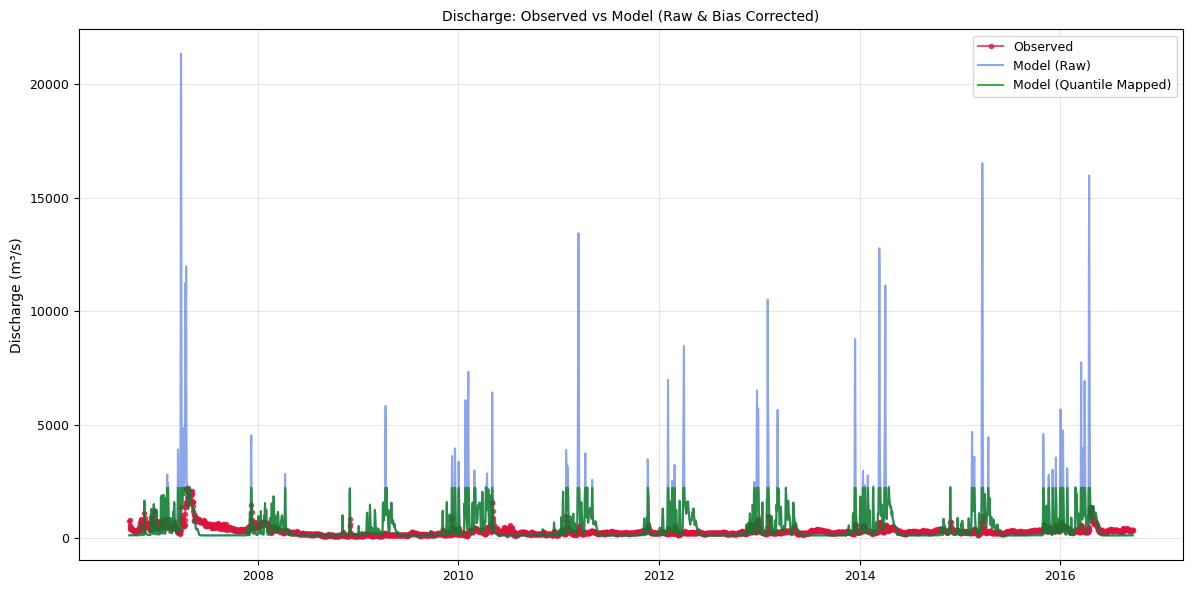


✅ Saved daily time series to discharge_bias_correction.xlsx


In [51]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ========== 1. Load Data ==========
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# --- Model Data ---
ds = xr.open_dataset(model_path)
dis = ds['dis24']
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)
model_ts = model_point.to_dataframe(name='model_discharge')

# --- Observation Data ---
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)
obs_df = obs_df[~obs_df.index.duplicated(keep='first')]  # Remove duplicate dates

# ========== 2. Align Data ==========
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

# Drop any NaNs (required for quantile mapping)
aligned = pd.concat([model_common, obs_common], axis=1, join='inner').dropna()
model_vals = aligned['model_discharge'].values.reshape(-1, 1)
obs_vals = aligned['obs_discharge'].values.reshape(-1, 1)

# ========== 3. Quantile Mapping Bias Correction ==========
qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(100, len(obs_vals)))
qt.fit(obs_vals)
model_qm = qt.inverse_transform(qt.transform(model_vals)).flatten()
aligned['model_discharge_qm'] = model_qm

# ========== 4. Statistics ==========
def print_stats(label, obs, mod):
    mae = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse = 1 - np.sum((obs - mod) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
    print(f"{label}:")
    print(f"  MAE:  {mae:.2f} m³/s")
    print(f"  RMSE: {rmse:.2f} m³/s")
    print(f"  NSE:  {nse:.3f}")

print("\n=== Statistics BEFORE Bias Correction ===")
print_stats("Model vs Obs", aligned['obs_discharge'], aligned['model_discharge'])

print("\n=== Statistics AFTER Quantile Mapping Bias Correction ===")
print_stats("QM Model vs Obs", aligned['obs_discharge'], aligned['model_discharge_qm'])

# ========== 5. Plot ==========
plt.figure(figsize=(12, 6))
plt.plot(aligned.index, aligned['obs_discharge'], label='Observed', color='crimson', marker='o', markersize=3, alpha=0.7)
plt.plot(aligned.index, aligned['model_discharge'], label='Model (Raw)', color='royalblue', alpha=0.6)
plt.plot(aligned.index, aligned['model_discharge_qm'], label='Model (Quantile Mapped)', color='green', alpha=0.7)
plt.title('Discharge: Observed vs Model (Raw & Bias Corrected)')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== 6. SAVE TO EXCEL (REVISED) ==========

# 6.1 Build an export DataFrame with explicit columns
export_df = pd.DataFrame({
    'Date':                   aligned.index,
    'Observed (m3/s)':        aligned['obs_discharge'].values,
    'Raw Model (m3/s)':       aligned['model_discharge'].values,
    'QM Corrected (m3/s)':    aligned['model_discharge_qm'].values
})

# 6.2 Set Date as the index (optional—Excel will still show it)
export_df.set_index('Date', inplace=True)

# 6.3 Write to Excel
excel_path = 'discharge_bias_correction.xlsx'
export_df.to_excel(excel_path, sheet_name='Daily', engine='openpyxl')

print(f"\n✅ Saved daily time series to {excel_path}")

Data aligned from 2006-09-21 to 2016-09-21 (3654 days)

=== RAW MODEL vs OBS ===
Raw Model                 | MAE:  449.91 | RMSE:  1241.72 | NSE: -32.051

Training set size: 2553 days, Test set size: 1095 days

Training XGBoost on 70% of the data...


c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



=== TRAINING SET METRICS ===
Training                  | MAE:    7.06 | RMSE:    10.07 | NSE:   0.998

=== TEST SET METRICS ===
Test                      | MAE:   69.24 | RMSE:   116.56 | NSE:   0.195


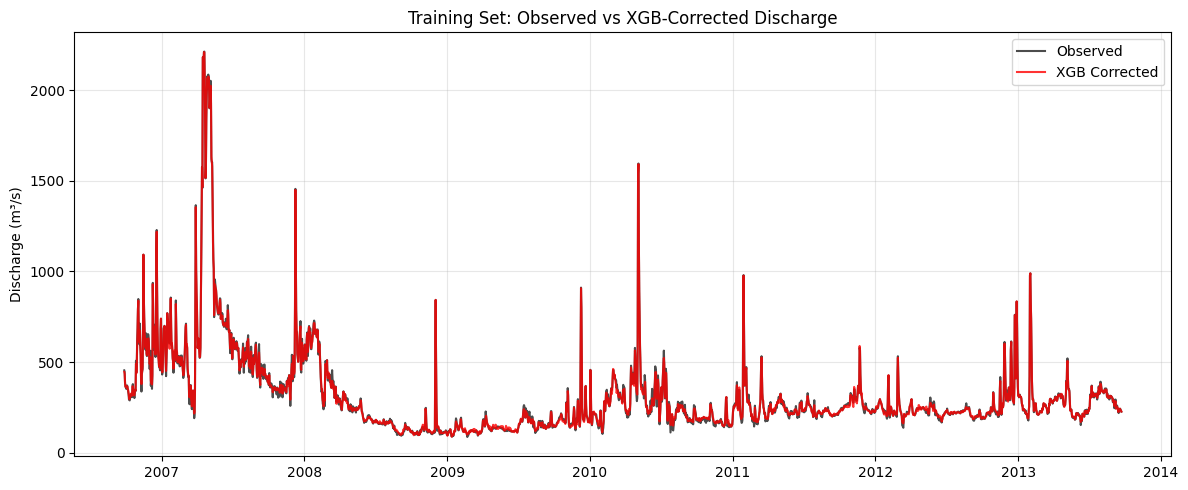

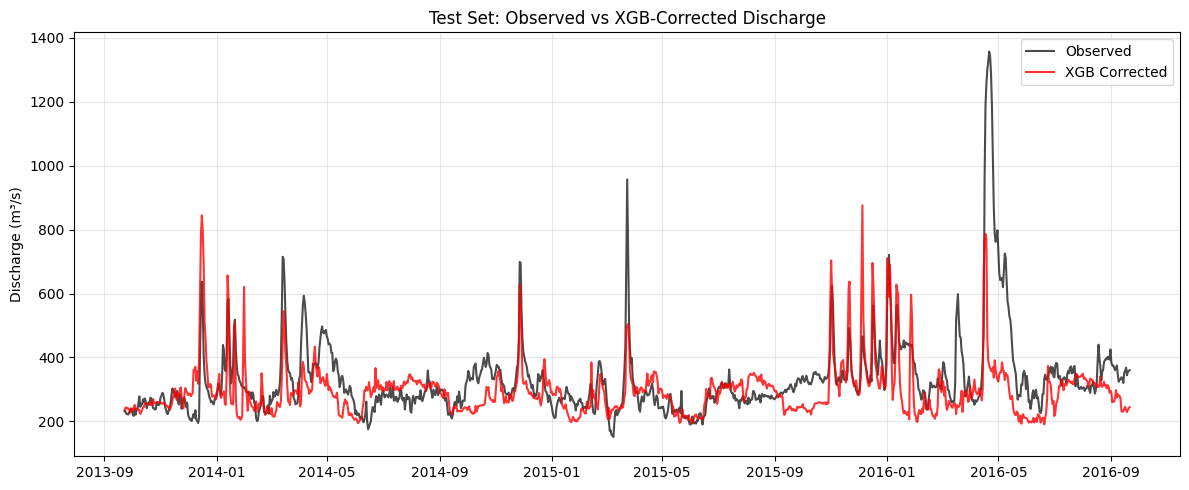

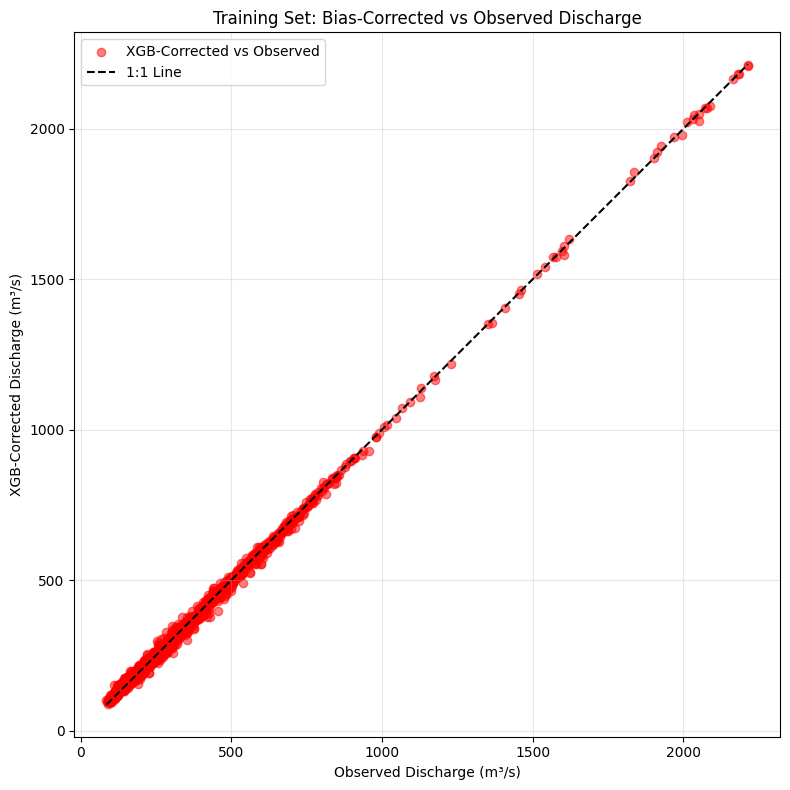

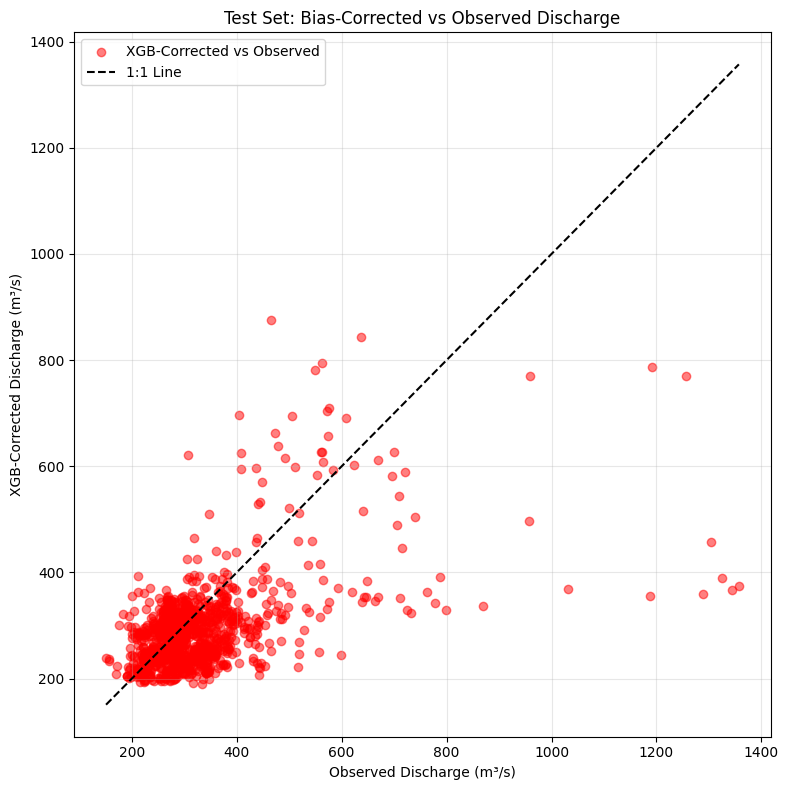

In [ ]:
# XGBoost with lags (1,2,3)
# XGBoost with lags (1,2,3)
# XGBoost with lags (1,2,3)
# XGBoost with lags (1,2,3)


import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ======== 1. CONFIGURATION ========
model_path = r"combined_dis24_2.nc"
obs_path   = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# XGBoost hyperparameters (adjusted to reduce overfitting)
XGB_PARAMS = {
    'n_estimators': 300,
    'max_depth': 6,  # Reduced from 12 to mitigate overfitting
    'learning_rate': 0.1,  # Added learning rate for better generalization
    'random_state': 42,
    'n_jobs': -1,
    'reg_lambda': 1.0,  # L2 regularization
    'reg_alpha': 0.5   # L1 regularization
}

# ======== 2. LOAD & ALIGN DATA ========
# 2.1 Load model discharge and select nearest grid cell
ds       = xr.open_dataset(model_path)
dis24    = ds['dis24']
model_pt = dis24.sel(
    latitude=target_lat,
    longitude=target_lon,
    method='nearest',
    tolerance=0.5
)
model_ts = model_pt.to_dataframe(name='model_discharge')

# 2.2 Load observed discharge
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df.rename(columns={'Value': 'obs_discharge'}, inplace=True)
obs_df.set_index('Date', inplace=True)

# 2.3 Align on common period and drop any NaNs
start = max(model_ts.index.min(), obs_df.index.min())
end   = min(model_ts.index.max(), obs_df.index.max())
df = pd.concat([
    model_ts.loc[start:end],
    obs_df.loc[start:end]
], axis=1, join='inner').dropna()

print(f"Data aligned from {start.date()} to {end.date()} ({len(df)} days)")

# Helper to print stats
def print_stats(label, obs, mod):
    mae  = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse  = 1 - np.sum((obs-mod)**2) / np.sum((obs-np.mean(obs))**2)
    print(f"{label:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Raw model performance
print("\n=== RAW MODEL vs OBS ===")
print_stats("Raw Model", df['obs_discharge'], df['model_discharge'])

# ======== 3. FEATURE ENGINEERING ========
# Add more features to improve model performance and reduce overfitting
df['lag_1'] = df['model_discharge'].shift(1)
df['lag_2'] = df['model_discharge'].shift(2)
df['lag_3'] = df['model_discharge'].shift(3)
df['rolling_mean_3'] = df['model_discharge'].rolling(3).mean()
df['rolling_mean_7'] = df['model_discharge'].rolling(7).mean()
df['rolling_std_7'] = df['model_discharge'].rolling(7).std()
# Cyclical features for seasonality
df['sin_dayofyear'] = np.sin(2 * np.pi * df.index.dayofyear / 365.25)
df['cos_dayofyear'] = np.cos(2 * np.pi * df.index.dayofyear / 365.25)
df['year'] = df.index.year

X = pd.DataFrame({
    'model_discharge': df['model_discharge'],
    'lag_1': df['lag_1'],
    'lag_2': df['lag_2'],
    'lag_3': df['lag_3'],
    'rolling_mean_3': df['rolling_mean_3'],
    'rolling_mean_7': df['rolling_mean_7'],
    'rolling_std_7': df['rolling_std_7'],
    'month': df.index.month,
    'dayofyear': df.index.dayofyear,
    'sin_dayofyear': df['sin_dayofyear'],
    'cos_dayofyear': df['cos_dayofyear'],
    'year': df['year']
}).dropna()
y = df['obs_discharge'].loc[X.index]

# ======== 4. TIME-BASED TRAIN-TEST SPLIT ========
train_size = int(0.7 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]
print(f"\nTraining set size: {len(X_train)} days, Test set size: {len(X_test)} days")

# ======== 5. MODEL TRAINING & PREDICTION ========
print("\nTraining XGBoost on 70% of the data...")
xgb = XGBRegressor(**XGB_PARAMS)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Print metrics for training set
print("\n=== TRAINING SET METRICS ===")
print_stats("Training", y_train, y_train_pred)

# Print metrics for test set
print("\n=== TEST SET METRICS ===")
print_stats("Test", y_test, y_test_pred)

# Add predictions to the original dataframe for plotting
df_train = df.loc[X_train.index].copy()
df_test = df.loc[X_test.index].copy()
df_train['model_xgb'] = y_train_pred
df_test['model_xgb'] = y_test_pred

# ======== 6. SAVE RESULTS TO EXCEL ========
# Save observation, original, and bias-corrected data to Excel
output_df = pd.concat([df_train[['obs_discharge', 'model_discharge', 'model_xgb']], 
                       df_test[['obs_discharge', 'model_discharge', 'model_xgb']]])
output_df.columns = ['Observed Discharge (m³/s)', 'Raw Model Discharge (m³/s)', 'XGB-Corrected Discharge (m³/s)']
output_df.to_excel('bias_correction_results.xlsx', index=True, index_label='Date')

# ======== 7. PLOT RESULTS ========
# 7.1 Time-series plot for Training Set
plt.figure(figsize=(12,5))
plt.plot(df_train.index, df_train['obs_discharge'], 'k-', label='Observed', alpha=0.7)
plt.plot(df_train.index, df_train['model_xgb'], 'r-', label='XGB Corrected', alpha=0.8)
plt.legend()
plt.title("Training Set: Observed vs XGB-Corrected Discharge")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7.2 Time-series plot for Test Set
plt.figure(figsize=(12,5))
plt.plot(df_test.index, df_test['obs_discharge'], 'k-', label='Observed', alpha=0.7)
plt.plot(df_test.index, df_test['model_xgb'], 'r-', label='XGB Corrected', alpha=0.8)
plt.legend()
plt.title("Test Set: Observed vs XGB-Corrected Discharge")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7.3 Scatter plot: Bias-corrected vs Observed for Training Set
plt.figure(figsize=(8,8))
plt.scatter(df_train['obs_discharge'], df_train['model_xgb'], color='red', alpha=0.5, label='XGB-Corrected vs Observed')
plt.plot([df_train['obs_discharge'].min(), df_train['obs_discharge'].max()], 
         [df_train['obs_discharge'].min(), df_train['obs_discharge'].max()], 
         'k--', label='1:1 Line')
plt.xlabel("Observed Discharge (m³/s)")
plt.ylabel("XGB-Corrected Discharge (m³/s)")
plt.title("Training Set: Bias-Corrected vs Observed Discharge")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7.4 Scatter plot: Bias-corrected vs Observed for Test Set
plt.figure(figsize=(8,8))
plt.scatter(df_test['obs_discharge'], df_test['model_xgb'], color='red', alpha=0.5, label='XGB-Corrected vs Observed')
plt.plot([df_test['obs_discharge'].min(), df_test['obs_discharge'].max()], 
         [df_test['obs_discharge'].min(), df_test['obs_discharge'].max()], 
         'k--', label='1:1 Line')
plt.xlabel("Observed Discharge (m³/s)")
plt.ylabel("XGB-Corrected Discharge (m³/s)")
plt.title("Test Set: Bias-Corrected vs Observed Discharge")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

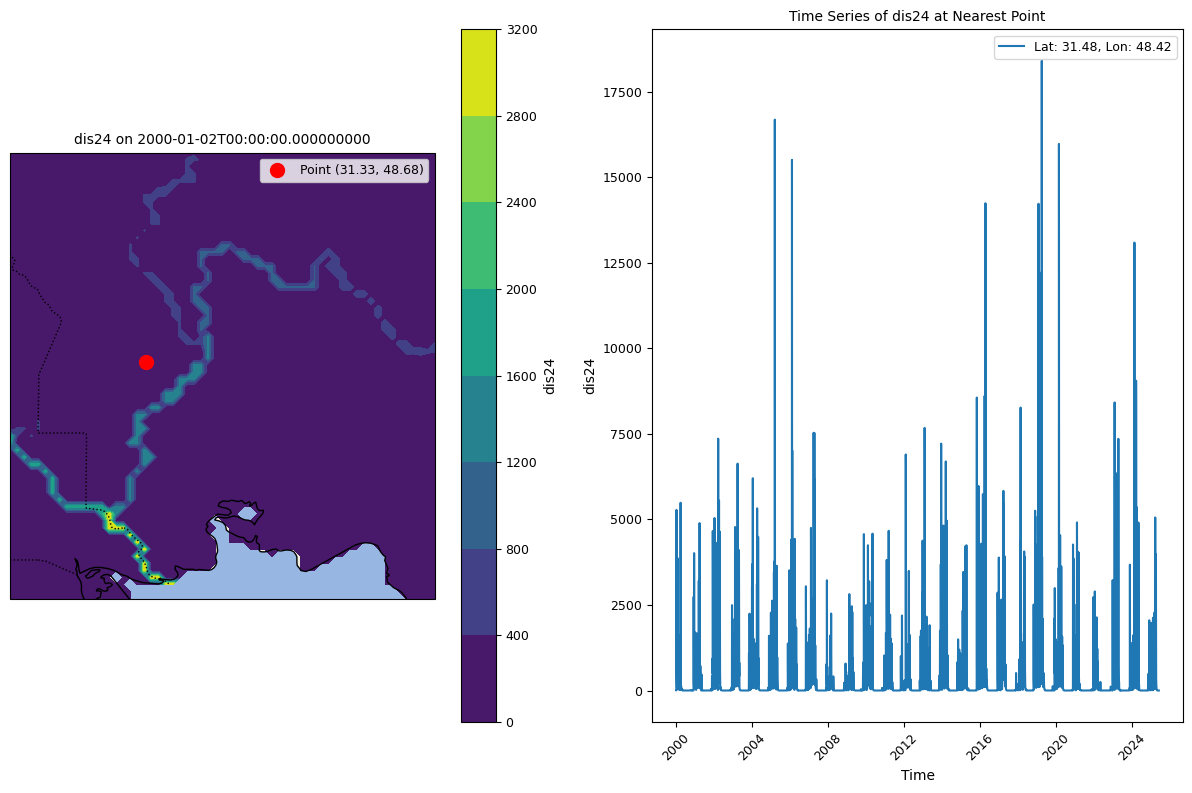

In [17]:
## Hamidiehhhh
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the dataset
Data_All = xr.open_dataset(r"combined_dis24_2.nc")

# Coordinates of the point of interest
target_lat = 31.5
target_lon = 48.433333

# Select the nearest grid point for the time series
point_data = Data_All['dis24'].sel(latitude=target_lat, longitude=target_lon, method='nearest')

# Create a figure with two subplots: one for the map, one for the time series
fig = plt.figure(figsize=(12, 8))

# --- Map Plot ---
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
# Plot the dis24 variable for the first time step
map_data = Data_All['dis24'].isel(valid_time=100)  # First time step (2007-01-02)
map_plot = ax1.contourf(
    Data_All['longitude'], Data_All['latitude'], map_data,
    cmap='viridis', transform=ccrs.PlateCarree()
)
# Add map features
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
# Mark the point of interest
ax1.plot(target_lon, target_lat, 'ro', markersize=10, transform=ccrs.PlateCarree(), label='Point (31.33, 48.68)')
# Add colorbar
plt.colorbar(map_plot, ax=ax1, label='dis24')
# Set title and labels
ax1.set_title(f'dis24 on {Data_All["valid_time"].isel(valid_time=0).values}')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()

# --- Time Series Plot ---
ax2 = fig.add_subplot(122)
# Plot the time series at the selected point
ax2.plot(Data_All['valid_time'], point_data, label=f'Lat: {point_data.latitude.values:.2f}, Lon: {point_data.longitude.values:.2f}')
# Set title and labels
ax2.set_title('Time Series of dis24 at Nearest Point')
ax2.set_xlabel('Time')
ax2.set_ylabel('dis24')
ax2.legend()
# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Model data index range: 2000-01-02 00:00:00 to 2025-06-01 00:00:00
Model data sample:             surface  latitude  longitude  model_discharge
valid_time                                               
2000-01-02      0.0    31.475     48.425         4.906250
2000-01-03      0.0    31.475     48.425         4.500000
2000-01-04      0.0    31.475     48.425         4.078125
2000-01-05      0.0    31.475     48.425         3.703125
2000-01-06      0.0    31.475     48.425      1146.359375
Model data NaN count: 0
Observed data index range: 2000-01-01 00:00:00 to 2016-09-21 00:00:00
Observed data sample:             obs_discharge
Date                     
2000-01-01           35.0
2000-01-02           35.0
2000-01-03           36.0
2000-01-04           35.0
2000-01-05           35.0
Observed data NaN count: 0
Common period: 2000-01-02 to 2016-09-21
Aligned data length before dropna: 6108
Data aligned from 2000-01-02 to 2016-09-21 (6108 days)

=== RAW MODEL vs OBS ===
Raw Model             

C:\Users\AAAli\AppData\Local\Temp\ipykernel_17708\3751953275.py:64: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').interpolate(method='linear')
c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



=== TRAINING SET METRICS ===
Training                  | MAE:   10.43 | RMSE:    18.22 | NSE:   0.892

=== TEST SET METRICS ===
Test                      | MAE:   13.62 | RMSE:    24.34 | NSE:   0.015


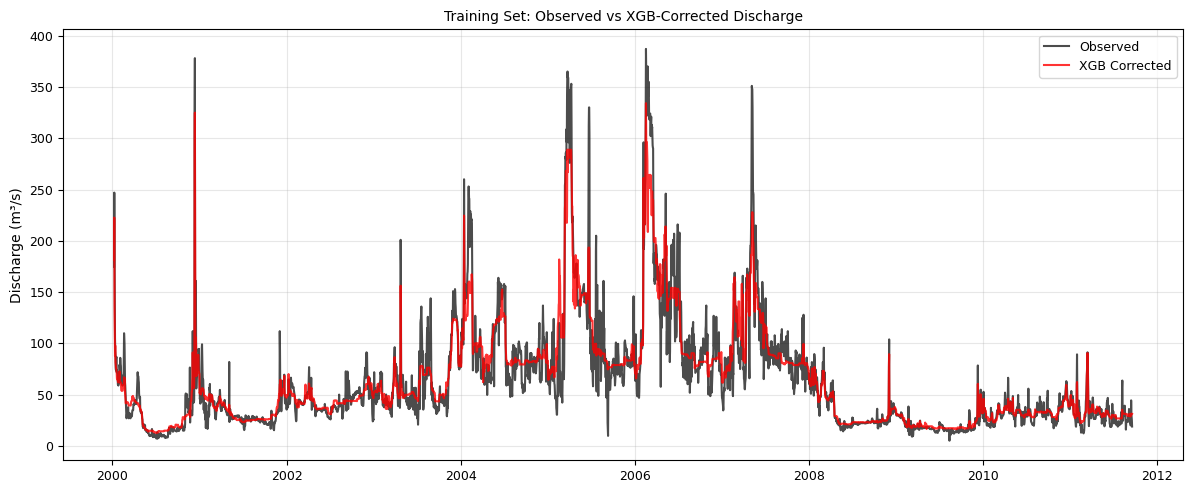

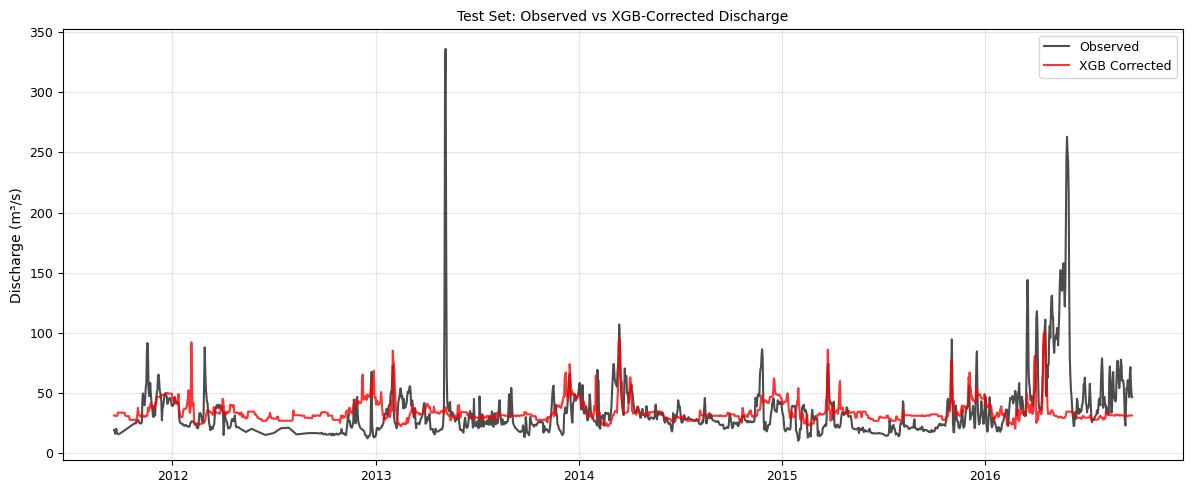

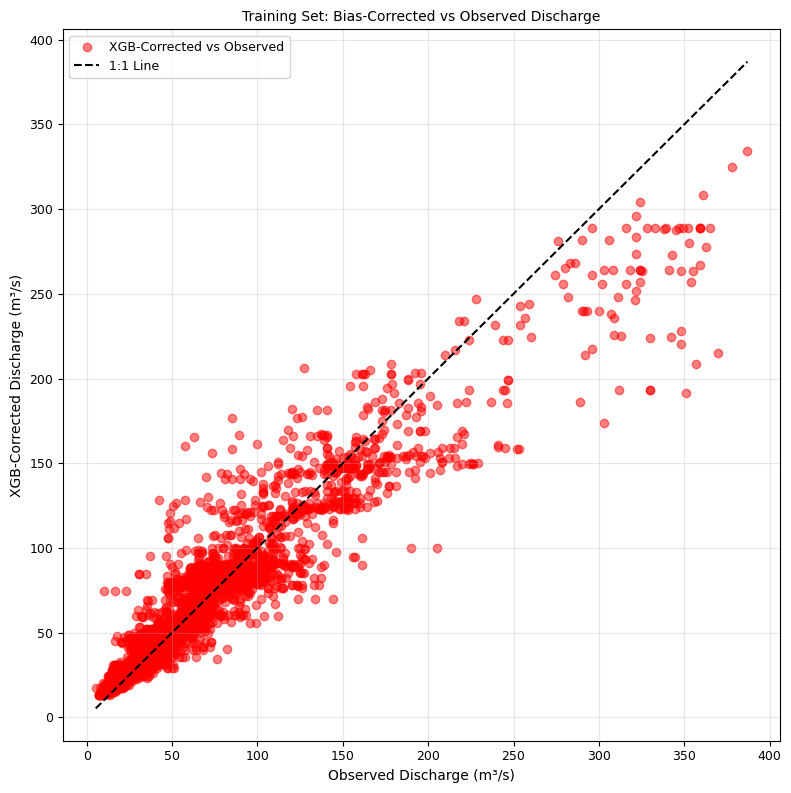

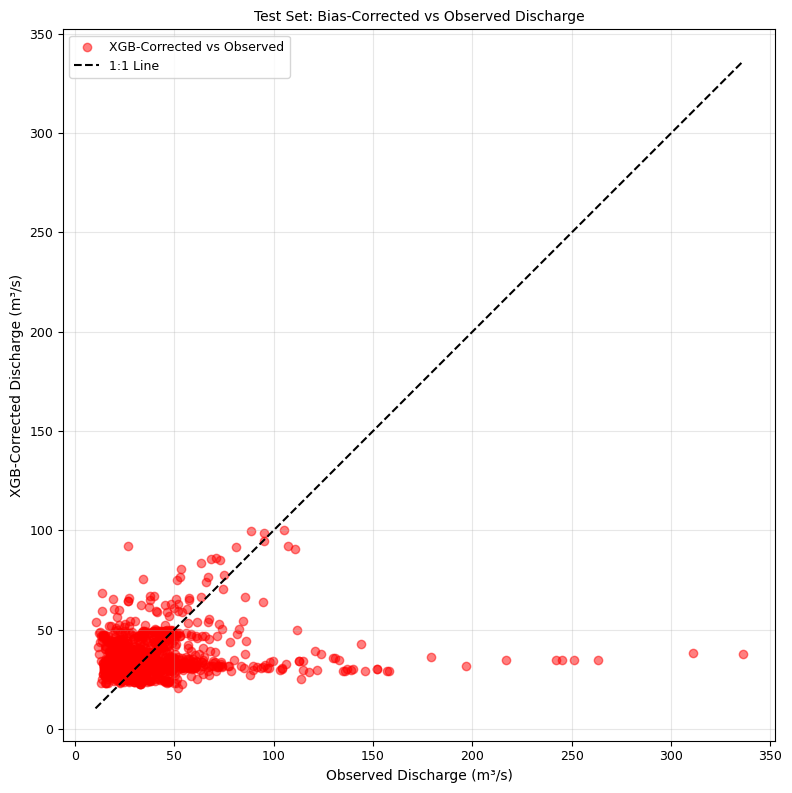

In [19]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ======== 1. CONFIGURATION ========
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Hamidieh.csv"
target_lat = 31.5
target_lon = 48.433333

XGB_PARAMS = {
    'n_estimators': 300,
    'max_depth': 6,
    'learning_rate': 0.1,
    'random_state': 42,
    'n_jobs': -1,
    'reg_lambda': 1.0,
    'reg_alpha': 0.5
}

# ======== 2. LOAD & ALIGN DATA ========
# 2.1 Load model discharge
ds = xr.open_dataset(model_path)
dis24 = ds['dis24']
model_pt = dis24.sel(latitude=target_lat, longitude=target_lon, method='nearest', tolerance=0.5)
model_ts = model_pt.to_dataframe(name='model_discharge')

# Debug: Check model data
print("Model data index range:", model_ts.index.min(), "to", model_ts.index.max())
print("Model data sample:", model_ts.head())
print("Model data NaN count:", model_ts['model_discharge'].isna().sum())

# 2.2 Load observed discharge
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df.rename(columns={'Value': 'obs_discharge'}, inplace=True)
obs_df.set_index('Date', inplace=True)

# Debug: Check observed data
print("Observed data index range:", obs_df.index.min(), "to", obs_df.index.max())
print("Observed data sample:", obs_df.head())
print("Observed data NaN count:", obs_df['obs_discharge'].isna().sum())

# Ensure daily frequency
model_ts = model_ts.resample('D').mean()
obs_df = obs_df.resample('D').mean()

# 2.3 Align on common period
start = max(model_ts.index.min(), obs_df.index.min())
end = min(model_ts.index.max(), obs_df.index.max())
print(f"Common period: {start.date()} to {end.date()}")

# Ensure timezone-naive indices
model_ts.index = model_ts.index.tz_localize(None)
obs_df.index = obs_df.index.tz_localize(None)

df = pd.concat([model_ts.loc[start:end], obs_df.loc[start:end]], axis=1, join='inner')
print("Aligned data length before dropna:", len(df))

# Fill NaNs instead of dropping
df = df.fillna(method='ffill').interpolate(method='linear')
print(f"Data aligned from {start.date()} to {end.date()} ({len(df)} days)")

# Check if DataFrame is empty
if len(df) == 0:
    raise ValueError("Aligned DataFrame is empty. Check date ranges or data availability.")

# Helper to print stats
def print_stats(label, obs, mod):
    mae = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse = 1 - np.sum((obs - mod) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
    print(f"{label:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Raw model performance
print("\n=== RAW MODEL vs OBS ===")
print_stats("Raw Model", df['obs_discharge'], df['model_discharge'])

# ======== 3. FEATURE ENGINEERING ========
df['lag_1'] = df['model_discharge'].shift(1)
df['lag_2'] = df['model_discharge'].shift(2)
df['lag_3'] = df['model_discharge'].shift(3)
df['rolling_mean_3'] = df['model_discharge'].rolling(3).mean()
df['rolling_mean_7'] = df['model_discharge'].rolling(7).mean()
df['rolling_std_7'] = df['model_discharge'].rolling(7).std()
df['sin_dayofyear'] = np.sin(2 * np.pi * df.index.dayofyear / 365.25)
df['cos_dayofyear'] = np.cos(2 * np.pi * df.index.dayofyear / 365.25)
df['year'] = df.index.year

X = pd.DataFrame({
    'model_discharge': df['model_discharge'],
    'lag_1': df['lag_1'],
    'lag_2': df['lag_2'],
    'lag_3': df['lag_3'],
    'rolling_mean_3': df['rolling_mean_3'],
    'rolling_mean_7': df['rolling_mean_7'],
    'rolling_std_7': df['rolling_std_7'],
    'month': df.index.month,
    'dayofyear': df.index.dayofyear,
    'sin_dayofyear': df['sin_dayofyear'],
    'cos_dayofyear': df['cos_dayofyear'],
    'year': df['year']
}).dropna()
y = df['obs_discharge'].loc[X.index]

# Check if X is empty
if len(X) == 0:
    raise ValueError("Feature DataFrame is empty after feature engineering. Check for NaNs or data issues.")

# ======== 4. TIME-BASED TRAIN-TEST SPLIT ========
train_size = int(0.7 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]
print(f"\nTraining set size: {len(X_train)} days, Test set size: {len(X_test)} days")

# ======== 5. MODEL TRAINING & PREDICTION ========
print("\nTraining XGBoost on 70% of the data...")
xgb = XGBRegressor(**XGB_PARAMS)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Print metrics
print("\n=== TRAINING SET METRICS ===")
print_stats("Training", y_train, y_train_pred)
print("\n=== TEST SET METRICS ===")
print_stats("Test", y_test, y_test_pred)

# Add predictions to DataFrame
df_train = df.loc[X_train.index].copy()
df_test = df.loc[X_test.index].copy()
df_train['model_xgb'] = y_train_pred
df_test['model_xgb'] = y_test_pred

# ======== 6. SAVE RESULTS TO EXCEL ========
output_df = pd.concat([df_train[['obs_discharge', 'model_discharge', 'model_xgb']],
                       df_test[['obs_discharge', 'model_discharge', 'model_xgb']]])
output_df.columns = ['Observed Discharge (m³/s)', 'Raw Model Discharge (m³/s)', 'XGB-Corrected Discharge (m³/s)']
output_df.to_excel('bias_correction_results.xlsx', index=True, index_label='Date')

# ======== 7. PLOT RESULTS ========
# Training Set Time-series
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['obs_discharge'], 'k-', label='Observed', alpha=0.7)
plt.plot(df_train.index, df_train['model_xgb'], 'r-', label='XGB Corrected', alpha=0.8)
plt.legend()
plt.title("Training Set: Observed vs XGB-Corrected Discharge")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Test Set Time-series
plt.figure(figsize=(12, 5))
plt.plot(df_test.index, df_test['obs_discharge'], 'k-', label='Observed', alpha=0.7)
plt.plot(df_test.index, df_test['model_xgb'], 'r-', label='XGB Corrected', alpha=0.8)
plt.legend()
plt.title("Test Set: Observed vs XGB-Corrected Discharge")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Training Set Scatter
plt.figure(figsize=(8, 8))
plt.scatter(df_train['obs_discharge'], df_train['model_xgb'], color='red', alpha=0.5, label='XGB-Corrected vs Observed')
plt.plot([df_train['obs_discharge'].min(), df_train['obs_discharge'].max()],
         [df_train['obs_discharge'].min(), df_train['obs_discharge'].max()],
         'k--', label='1:1 Line')
plt.xlabel("Observed Discharge (m³/s)")
plt.ylabel("XGB-Corrected Discharge (m³/s)")
plt.title("Training Set: Bias-Corrected vs Observed Discharge")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Test Set Scatter
plt.figure(figsize=(8, 8))
plt.scatter(df_test['obs_discharge'], df_test['model_xgb'], color='red', alpha=0.5, label='XGB-Corrected vs Observed')
plt.plot([df_test['obs_discharge'].min(), df_test['obs_discharge'].max()],
         [df_test['obs_discharge'].min(), df_test['obs_discharge'].max()],
         'k--', label='1:1 Line')
plt.xlabel("Observed Discharge (m³/s)")
plt.ylabel("XGB-Corrected Discharge (m³/s)")
plt.title("Test Set: Bias-Corrected vs Observed Discharge")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Model data index range: 2000-01-02 00:00:00 to 2025-06-01 00:00:00
Model data sample:             surface  latitude  longitude  model_discharge
valid_time                                               
2000-01-02      0.0    31.475     48.425         4.906250
2000-01-03      0.0    31.475     48.425         4.500000
2000-01-04      0.0    31.475     48.425         4.078125
2000-01-05      0.0    31.475     48.425         3.703125
2000-01-06      0.0    31.475     48.425      1146.359375
Model data NaN count: 0
Observed data index range: 2000-01-01 00:00:00 to 2016-09-21 00:00:00
Observed data sample:             obs_discharge
Date                     
2000-01-01           35.0
2000-01-02           35.0
2000-01-03           36.0
2000-01-04           35.0
2000-01-05           35.0
Observed data NaN count: 0
Monthly model data sample:             surface  latitude  longitude  model_discharge
valid_time                                               
2000-01-31      0.0    31.475     48.425

C:\Users\AAAli\AppData\Local\Temp\ipykernel_17708\2455978834.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').interpolate(method='linear')



=== TRAINING SET METRICS ===
Training                  | MAE:   24.23 | RMSE:    30.59 | NSE:   0.626

=== TEST SET METRICS ===
Test                      | MAE:   27.46 | RMSE:    30.30 | NSE:  -1.619


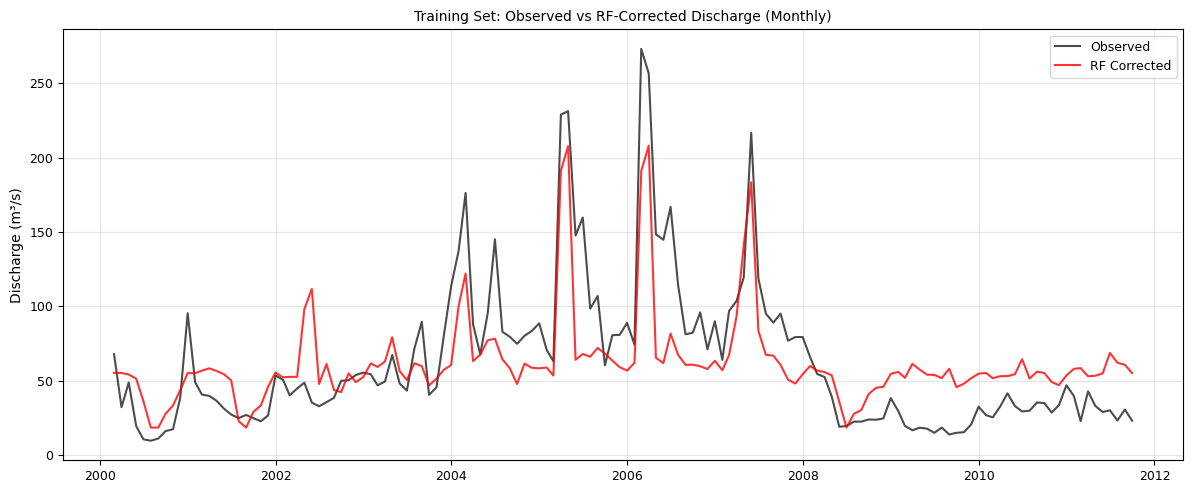

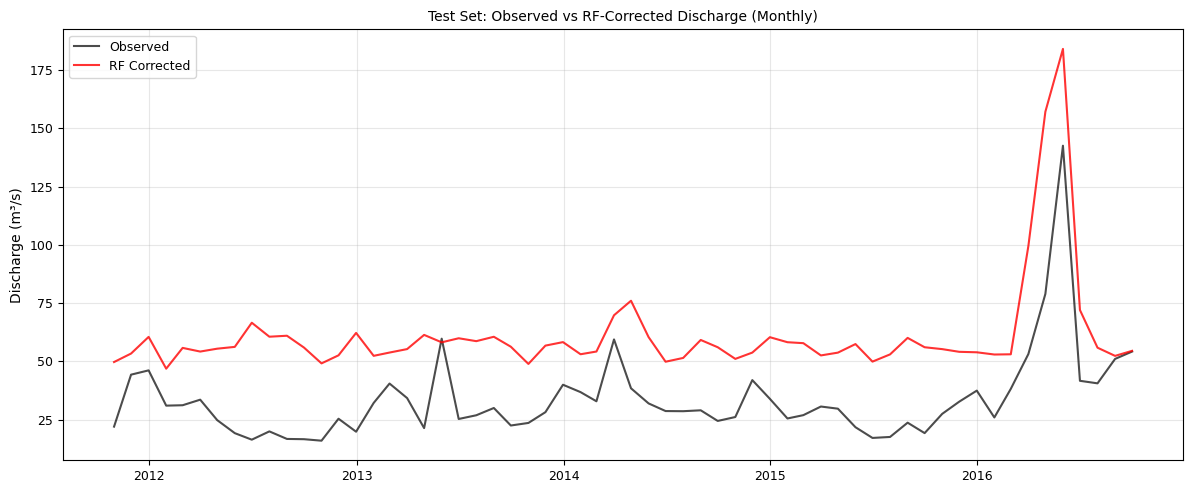

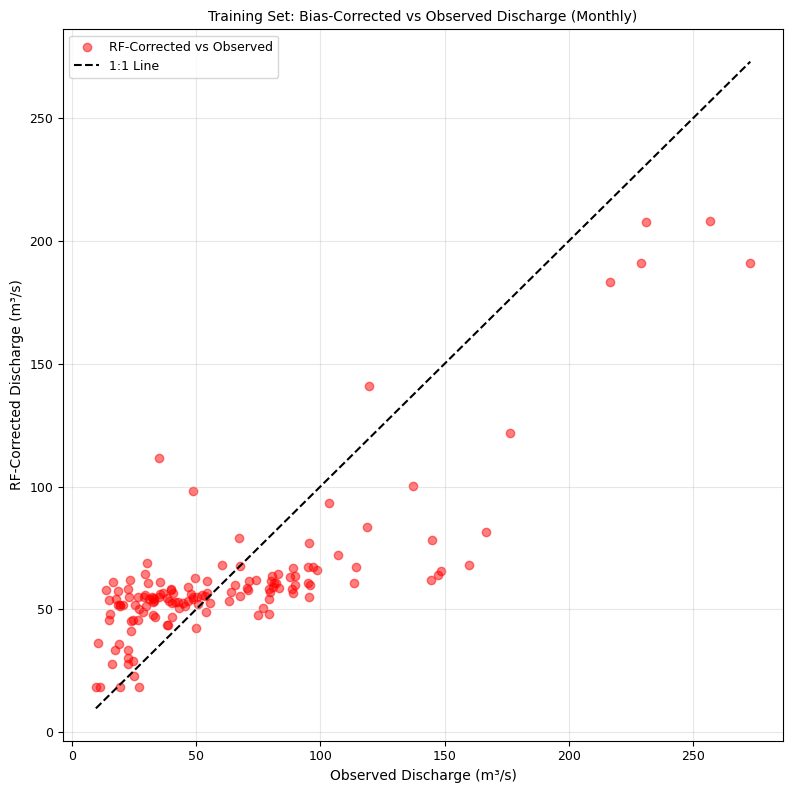

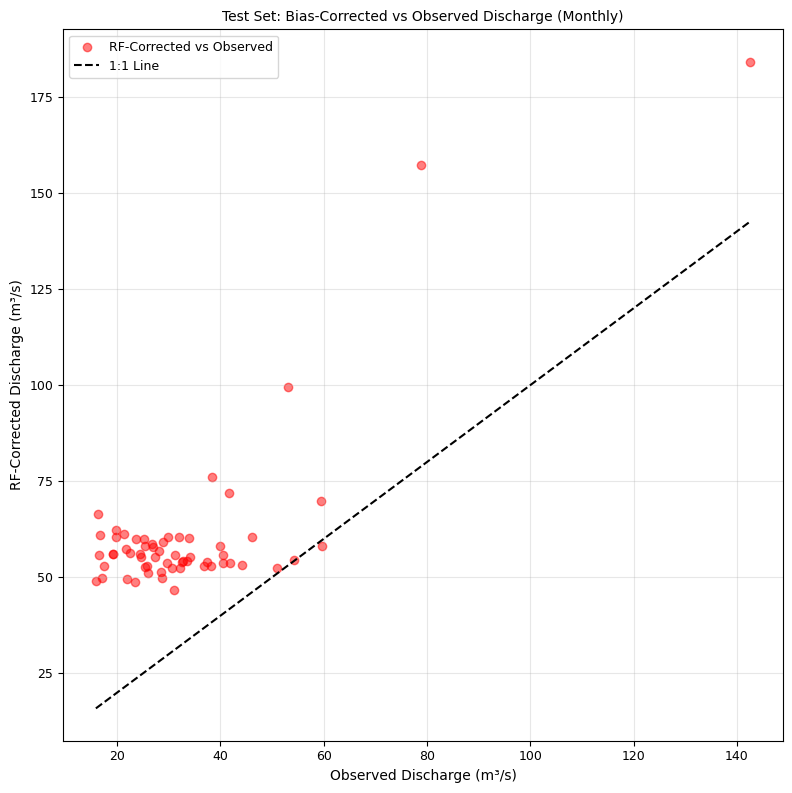

In [23]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ======== 1. CONFIGURATION ========
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Hamidieh.csv"
target_lat = 31.5
target_lon = 48.433333

# Random Forest hyperparameters
RF_PARAMS = {
    'n_estimators': 300,
    'max_depth': 6,
    'random_state': 42,
    'n_jobs': -1,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# ======== 2. LOAD & ALIGN DATA ========
# 2.1 Load model discharge
ds = xr.open_dataset(model_path)
dis24 = ds['dis24']
model_pt = dis24.sel(latitude=target_lat, longitude=target_lon, method='nearest', tolerance=0.5)
model_ts = model_pt.to_dataframe(name='model_discharge')

# Debug: Check model data
print("Model data index range:", model_ts.index.min(), "to", model_ts.index.max())
print("Model data sample:", model_ts.head())
print("Model data NaN count:", model_ts['model_discharge'].isna().sum())

# 2.2 Load observed discharge
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df.rename(columns={'Value': 'obs_discharge'}, inplace=True)
obs_df.set_index('Date', inplace=True)

# Debug: Check observed data
print("Observed data index range:", obs_df.index.min(), "to", obs_df.index.max())
print("Observed data sample:", obs_df.head())
print("Observed data NaN count:", obs_df['obs_discharge'].isna().sum())

# Convert to monthly averages
model_ts = model_ts.resample('ME').mean()  # 'ME' for month-end
obs_df = obs_df.resample('ME').mean()

# Debug: Check monthly data
print("Monthly model data sample:", model_ts.head())
print("Monthly observed data sample:", obs_df.head())

# 2.3 Align on common period
start = max(model_ts.index.min(), obs_df.index.min())
end = min(model_ts.index.max(), obs_df.index.max())
print(f"Common period: {start.date()} to {end.date()}")

# Ensure timezone-naive indices
model_ts.index = model_ts.index.tz_localize(None)
obs_df.index = obs_df.index.tz_localize(None)

df = pd.concat([model_ts.loc[start:end], obs_df.loc[start:end]], axis=1, join='inner')
print("Aligned data length before dropna:", len(df))

# Fill NaNs instead of dropping
df = df.fillna(method='ffill').interpolate(method='linear')
print(f"Data aligned from {start.date()} to {end.date()} ({len(df)} months)")

# Check if DataFrame is empty
if len(df) == 0:
    raise ValueError("Aligned DataFrame is empty. Check date ranges or data availability.")

# Helper to print stats
def print_stats(label, obs, mod):
    mae = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse = 1 - np.sum((obs - mod) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
    print(f"{label:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Raw model performance
print("\n=== RAW MODEL vs OBS ===")
print_stats("Raw Model", df['obs_discharge'], df['model_discharge'])

# ======== 3. FEATURE ENGINEERING ========
# Create lag_1 feature (previous month's discharge)
df['lag_1'] = df['model_discharge'].shift(1)

# Create feature DataFrame with only model_discharge and lag_1
X = pd.DataFrame({
    'model_discharge': df['model_discharge'],
    'lag_1': df['lag_1']
}).dropna()
y = df['obs_discharge'].loc[X.index]

# Check if X is empty
if len(X) == 0:
    raise ValueError("Feature DataFrame is empty after feature engineering. Check for NaNs or data issues.")

# ======== 4. TIME-BASED TRAIN-TEST SPLIT ========
train_size = int(0.7 * len(X))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]
print(f"\nTraining set size: {len(X_train)} months, Test set size: {len(X_test)} months")

# ======== 5. MODEL TRAINING & PREDICTION ========
print("\nTraining Random Forest on 70% of the data...")
rf = RandomForestRegressor(**RF_PARAMS)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Print metrics
print("\n=== TRAINING SET METRICS ===")
print_stats("Training", y_train, y_train_pred)
print("\n=== TEST SET METRICS ===")
print_stats("Test", y_test, y_test_pred)

# Add predictions to DataFrame
df_train = df.loc[X_train.index].copy()
df_test = df.loc[X_test.index].copy()
df_train['model_rf'] = y_train_pred
df_test['model_rf'] = y_test_pred

# ======== 6. SAVE RESULTS TO EXCEL ========
output_df = pd.concat([df_train[['obs_discharge', 'model_discharge', 'model_rf']],
                       df_test[['obs_discharge', 'model_discharge', 'model_rf']]])
output_df.columns = ['Observed Discharge (m³/s)', 'Raw Model Discharge (m³/s)', 'RF-Corrected Discharge (m³/s)']
output_df.to_excel('bias_correction_monthly_rf_results.xlsx', index=True, index_label='Date')

# ======== 7. PLOT RESULTS ========
# Training Set Time-series
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['obs_discharge'], 'k-', label='Observed', alpha=0.7)
plt.plot(df_train.index, df_train['model_rf'], 'r-', label='RF Corrected', alpha=0.8)
plt.legend()
plt.title("Training Set: Observed vs RF-Corrected Discharge (Monthly)")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Test Set Time-series
plt.figure(figsize=(12, 5))
plt.plot(df_test.index, df_test['obs_discharge'], 'k-', label='Observed', alpha=0.7)
plt.plot(df_test.index, df_test['model_rf'], 'r-', label='RF Corrected', alpha=0.8)
plt.legend()
plt.title("Test Set: Observed vs RF-Corrected Discharge (Monthly)")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Training Set Scatter
plt.figure(figsize=(8, 8))
plt.scatter(df_train['obs_discharge'], df_train['model_rf'], color='red', alpha=0.5, label='RF-Corrected vs Observed')
plt.plot([df_train['obs_discharge'].min(), df_train['obs_discharge'].max()],
         [df_train['obs_discharge'].min(), df_train['obs_discharge'].max()],
         'k--', label='1:1 Line')
plt.xlabel("Observed Discharge (m³/s)")
plt.ylabel("RF-Corrected Discharge (m³/s)")
plt.title("Training Set: Bias-Corrected vs Observed Discharge (Monthly)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Test Set Scatter
plt.figure(figsize=(8, 8))
plt.scatter(df_test['obs_discharge'], df_test['model_rf'], color='red', alpha=0.5, label='RF-Corrected vs Observed')
plt.plot([df_test['obs_discharge'].min(), df_test['obs_discharge'].max()],
         [df_test['obs_discharge'].min(), df_test['obs_discharge'].max()],
         'k--', label='1:1 Line')
plt.xlabel("Observed Discharge (m³/s)")
plt.ylabel("RF-Corrected Discharge (m³/s)")
plt.title("Test Set: Bias-Corrected vs Observed Discharge (Monthly)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


✅ Model data extracted at:
   Selected Latitude: 31.475000
   Selected Longitude: 48.425000
   Distance from target: 0.0250°, 0.0083°

⏱️ Common time period: 2006-09-21 to 2016-09-21
   Model data points: 3654
   Observation data points: 3654


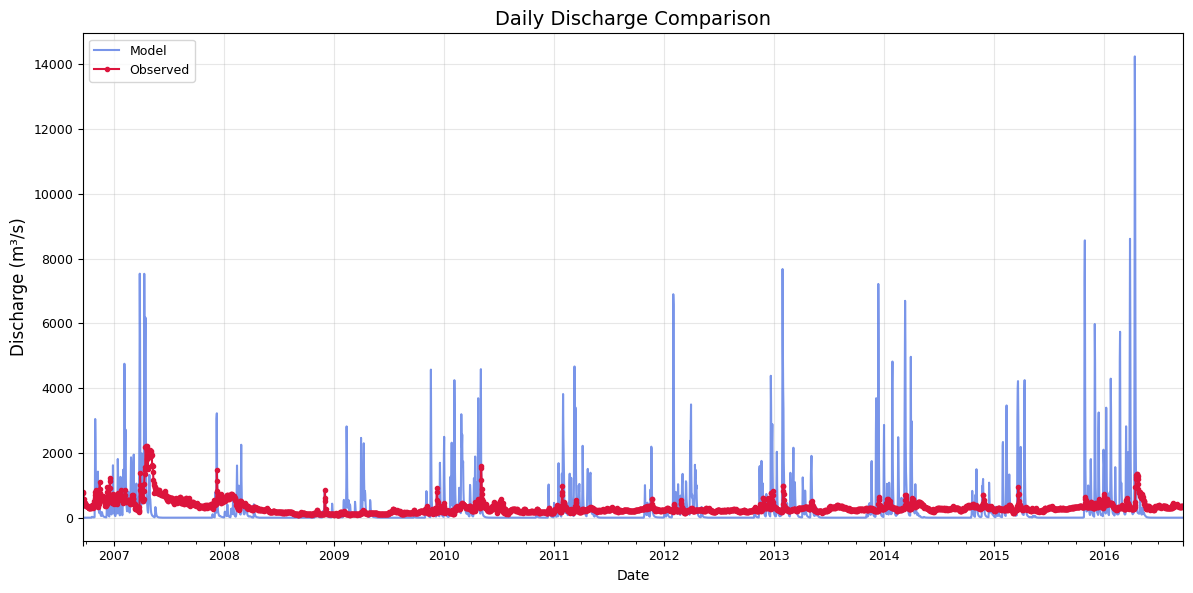

C:\Users\AAAli\AppData\Local\Temp\ipykernel_17708\3380143858.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample('M').mean(numeric_only=True)


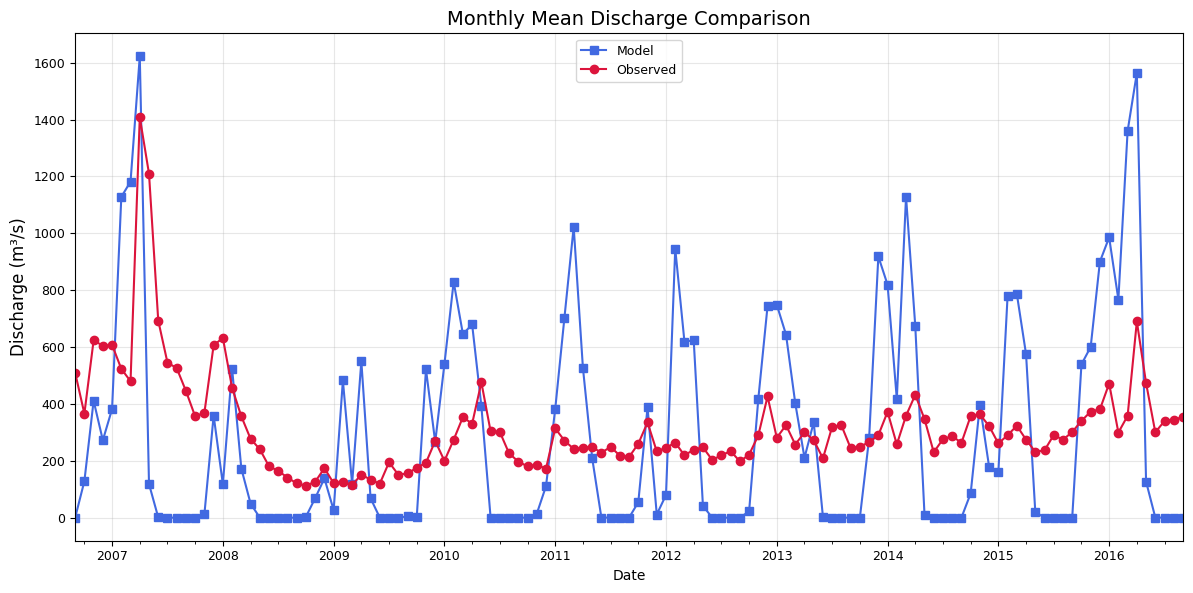


📊 Monthly Statistics:
Model Mean: 290.52 m³/s
Observed Mean: 317.67 m³/s
MAE: 293.05 m³/s
RMSE: 353.94 m³/s
NSE: -2.858


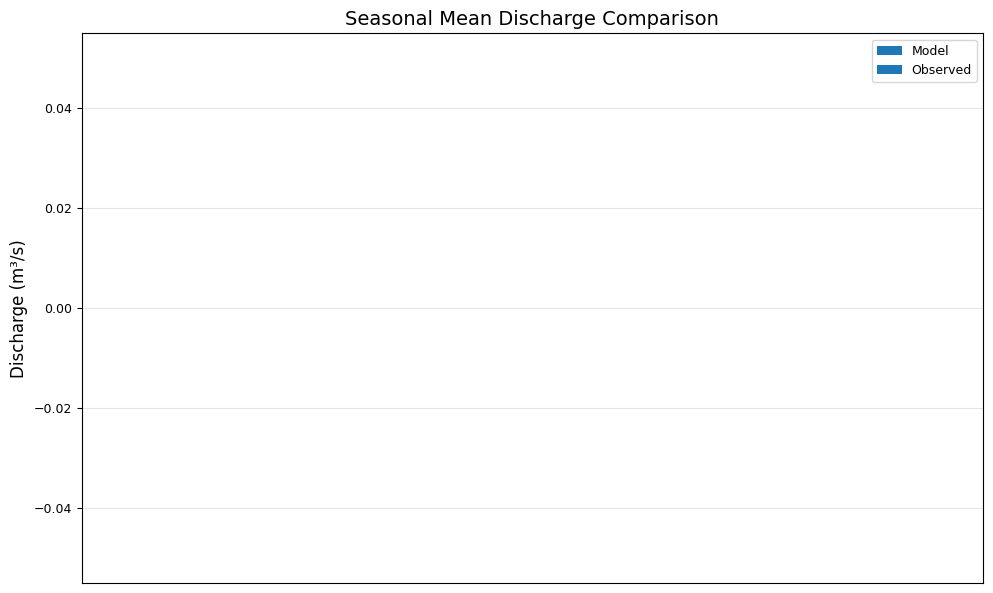


✅ Analysis complete!


In [20]:
# -*- coding: utf-8 -*-
"""
Model vs Observation Discharge Comparison at Ahvaz Station (Monthly & Seasonal Analysis!)
- Added monthly and seasonal aggregation
- Includes new visualizations and statistical comparisons
- All previous fixes for data loading and alignment included
"""

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ================== 1. Configuration ==================
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.5
target_lon = 48.433333

# ================== 2. Load and Prepare Model Data ==================
ds = xr.open_dataset(model_path)
dis = ds['dis24']  # Discharge variable

# Use xarray's built-in nearest neighbor selection
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)

print(f"\n✅ Model data extracted at:")
print(f"   Selected Latitude: {model_point.latitude.values:.6f}")
print(f"   Selected Longitude: {model_point.longitude.values:.6f}")
print(f"   Distance from target: {np.abs(target_lat - model_point.latitude.values):.4f}°, "
      f"{np.abs(target_lon - model_point.longitude.values):.4f}°")

model_ts = model_point.to_dataframe(name='model_discharge')

# ================== 3. Load Observation Data (FLEXIBLE DATE PARSING) ==================
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')  # Flexible parsing
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)

# Remove rows with invalid dates
if obs_df.index.hasnans:
    obs_df = obs_df.dropna(subset=['obs_discharge'])

# ================== 4. Align Time Periods ==================
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

print(f"\n⏱️ Common time period: {common_start.strftime('%Y-%m-%d')} to {common_end.strftime('%Y-%m-%d')}")
print(f"   Model data points: {len(model_common):d}")
print(f"   Observation data points: {len(obs_common):d}")

# ================== 5. Daily Comparison (Original) ==================
plt.figure(figsize=(12, 6))
model_common['model_discharge'].plot(label='Model', color='royalblue', alpha=0.7)
obs_common['obs_discharge'].plot(label='Observed', color='crimson', marker='o', markersize=3)
plt.title('Daily Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================== 6. Monthly Aggregation ==================
def aggregate_monthly(data):
    monthly = data.resample('M').mean(numeric_only=True)
    monthly.index = monthly.index.to_period('M')  # Use period for better labeling
    return monthly

model_monthly = aggregate_monthly(model_common)
obs_monthly = aggregate_monthly(obs_common)

# Monthly comparison plot
plt.figure(figsize=(12, 6))
model_monthly['model_discharge'].plot(label='Model', color='royalblue', marker='s')
obs_monthly['obs_discharge'].plot(label='Observed', color='crimson', marker='o')
plt.title('Monthly Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly statistics
if len(model_monthly) > 0 and len(obs_monthly) > 0:
    merged_monthly = pd.merge(model_monthly, obs_monthly, left_index=True, right_index=True, how='inner')
    print("\n📊 Monthly Statistics:")
    print(f"Model Mean: {merged_monthly['model_discharge'].mean():.2f} m³/s")
    print(f"Observed Mean: {merged_monthly['obs_discharge'].mean():.2f} m³/s")
    print(f"MAE: {mean_absolute_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge']):.2f} m³/s")
    print(f"RMSE: {np.sqrt(mean_squared_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge'])):.2f} m³/s")
    
    # NSE for monthly
    obs_mean_monthly = merged_monthly['obs_discharge'].mean()
    numerator = ((merged_monthly['obs_discharge'] - merged_monthly['model_discharge'])**2).sum()
    denominator = ((merged_monthly['obs_discharge'] - obs_mean_monthly)**2).sum()
    nse_monthly = 1 - (numerator / denominator) if denominator != 0 else float('nan')
    print(f"NSE: {nse_monthly:.3f}")

# ================== 7. Seasonal Aggregation ==================
def seasonal_group(data):
    # Define seasons: DJF, MAM, JJA, SON
    seasons = {
        'Winter': (data.index.month == 12) | (data.index.month <= 2),
        'Spring': (data.index.month >= 3) & (data.index.month <= 5),
        'Summer': (data.index.month >= 6) & (data.index.month <= 8),
        'Autumn': (data.index.month >= 9) & (data.index.month <= 11)
    }
    return data.groupby(seasons).mean(numeric_only=True)

# Apply seasonal grouping
model_seasonal = seasonal_group(model_common)
obs_seasonal = seasonal_group(obs_common)

# Seasonal comparison plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_seasonal.index))
width = 0.35
plt.bar(x - width/2, model_seasonal['model_discharge'], width, label='Model', color='royalblue')
plt.bar(x + width/2, obs_seasonal['obs_discharge'], width, label='Observed', color='crimson')
plt.title('Seasonal Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xticks(x, model_seasonal.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Seasonal statistics
if len(model_seasonal) > 0 and len(obs_seasonal) > 0:
    merged_seasonal = pd.merge(model_seasonal, obs_seasonal, left_index=True, right_index=True, how='inner')
    print("\n📊 Seasonal Statistics:")
    for season in merged_seasonal.index:
        mod = merged_seasonal.loc[season, 'model_discharge']
        obs = merged_seasonal.loc[season, 'obs_discharge']
        print(f"\n{season}:")
        print(f"  Model: {mod:.2f} m³/s | Observed: {obs:.2f} m³/s")
        print(f"  MAE: {mean_absolute_error([obs], [mod]):.2f} m³/s")
        print(f"  RMSE: {np.sqrt(mean_squared_error([obs], [mod])):.2f} m³/s")
        # NSE for single season
        nse_season = float('nan') if obs == 0 else 1 - ((obs - mod)**2) / ((obs - obs)**2)
        print(f"  NSE: {nse_season:.3f}")

print("\n✅ Analysis complete!")

In [4]:
import ee
import geemap
import os

In [5]:
ee.Authenticate()

True

In [6]:
ee.Initialize()


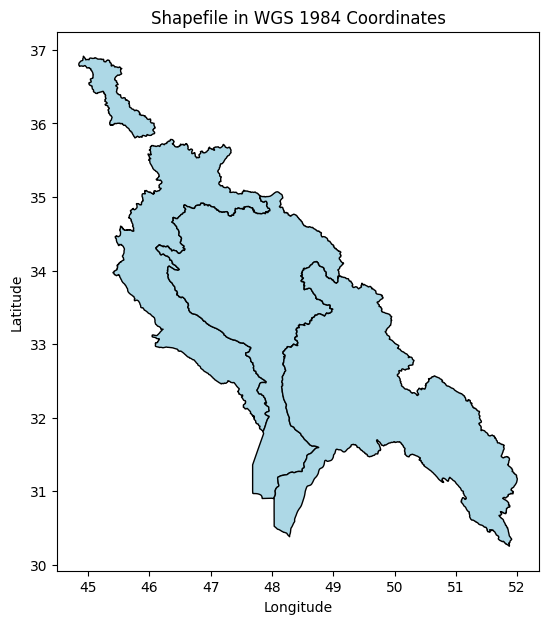

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your shapefile (replace with the correct path)
shapefile_path = r"GIS\ROI_3Basin\3Basin_Karkheh.shp"
gdf = gpd.read_file(shapefile_path)

# Convert the GeoDataFrame to WGS 1984 (EPSG:4326) if it's not already in that CRS
gdf = gdf.to_crs(epsg=4326)

# Plot the shapefile
gdf.plot(figsize=(7, 7), edgecolor='black', facecolor='lightblue')

# Add title and labels
plt.title('Shapefile in WGS 1984 Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
import geemap
import ee
import geopandas as gpd
import datetime
import os
import xarray as xr

# Configuration Section
CONFIG = {
    # Input shapefile
    'shapefile_path': r"GIS\ROI_3Basin\3Basin_Karkheh.shp",
    
    # Data source
    'data_source': "UCSB-CHG/CHIRPS/DAILY",
    'data_band': "precipitation",
    
    # Date range
    'start_year': 2012,
    'end_year': 2025,
    'start_month': 1,
    'end_month': 12,
    
    # Output specifications
    'output_directory': r"Data_P_CHIRPS_Daily",
    'output_crs': "EPSG:4326",
    'output_resolution': 0.01,  # in degrees (~1km at equator)
    
    # Output file naming
    'output_prefix': "CHIRPS_Pr_Daily_1km_ROI"
}

def download_chirps_data(config):
    """
    Download daily CHIRPS precipitation data for specified region and time period,
    saving each month's data in a separate NetCDF file.
    
    Args:
        config (dict): Configuration dictionary containing all necessary parameters
    """
    # Initialize Earth Engine
    ee.Initialize()
    
    # Create output directory if it doesn't exist
    os.makedirs(config['output_directory'], exist_ok=True)
    
    # Load and prepare the shapefile
    gdf = gpd.read_file(config['shapefile_path'])
    gdf = gdf.to_crs(config['output_crs'])
    region = geemap.geojson_to_ee(gdf.__geo_interface__)
    
    # Convert FeatureCollection to Geometry if necessary
    if isinstance(region, ee.FeatureCollection):
        region = region.geometry()
    
    # Loop through each year and month
    for year in range(config['start_year'], config['end_year'] + 1):
        for month in range(config['start_month'], config['end_month'] + 1):
            try:
                # Define date range for the month
                start_date = datetime.datetime(year, month, 1)
                if month == 12:
                    end_date = datetime.datetime(year + 1, 1, 1)
                else:
                    end_date = datetime.datetime(year, month + 1, 1)
                
                # Load CHIRPS dataset for the month
                collection = (
                    ee.ImageCollection(config['data_source'])
                    .filterBounds(region)
                    .filterDate(start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
                    .select(config['data_band'])
                )
                
                # Convert to xarray dataset
                ds = geemap.ee_to_xarray(
                    dataset=collection,
                    crs=config['output_crs'],
                    scale=config['output_resolution'],
                    geometry=region
                )
                
                # Define and save output
                output_filename = f"{config['output_prefix']}_{year}_{month:02d}.nc"
                output_path = os.path.join(config['output_directory'], output_filename)
                
                ds.to_netcdf(output_path)
                print(f"Daily NetCDF file for {year}-{month:02d} saved to: {output_path}")
                
            except Exception as e:
                print(f"Error processing data for {year}-{month:02d}: {str(e)}")
                continue

if __name__ == "__main__":
    download_chirps_data(CONFIG)

Daily NetCDF file for 2012-01 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_01.nc
Daily NetCDF file for 2012-02 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_02.nc
Daily NetCDF file for 2012-03 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_03.nc
Daily NetCDF file for 2012-04 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_04.nc
Daily NetCDF file for 2012-05 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_05.nc
Daily NetCDF file for 2012-06 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_06.nc
Daily NetCDF file for 2012-07 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_07.nc
Daily NetCDF file for 2012-08 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_08.nc
Daily NetCDF file for 2012-09 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_09.nc
Daily NetCDF file for 2012-10 saved to: Data_P_CHIRPS_Daily\CHIRPS_Pr_Daily_1km_ROI_2012_10.nc
Daily NetCDF file for 2012-11 saved to: Data_P_CHI